# Интерпретируемость модели 


In [1]:
import os

print(f"Текущая директория: {os.getcwd()}")

file_path = 'saved_models_dis_last/all_training_data.pkl'
print(f"Путь к файлу: {file_path}")
print(f"Файл существует: {os.path.exists(file_path)}")

if os.path.exists('saved_models_dis_last'):
    print(f"Содержимое папки saved_models_dis_last:")
    for item in os.listdir('saved_models_dis_last'):
        print(f"  - {item}")
else:
    print("Папка saved_models_dis_last не существует!")

Текущая директория: /nfs/home/emarenina/notebook_disease
Путь к файлу: saved_models_dis_last/all_training_data.pkl
Файл существует: True
Содержимое папки saved_models_dis_last:
  - catboost_model_fold_0.joblib
  - all_training_data.pkl


In [2]:
import pickle 
import joblib


with open('saved_models_dis_last/all_training_data.pkl', 'rb') as f:
    loaded_all_data = pickle.load(f)





In [3]:
shap_data = loaded_all_data['shap_data']

## Проверка качества 

У нас есть обученная модель CatBoost с кросс-валидацией и мы хотим проверить её на честность путем усреднения предсказаний для групп с одинаковыми заболеваниями



In [4]:
loaded_all_data["models"]

{'CatBoost': [<catboost.core.CatBoostClassifier at 0x7fee13b24df0>,
  <catboost.core.CatBoostClassifier at 0x7fede1ba2830>]}

In [5]:
import pandas as pd

train_data = pd.read_csv("data_final_disease_clean_all.csv", encoding='utf-8')
test_data = pd.read_csv("data_test_disease_final_clean.csv", encoding='utf-8') 

with open("folds_indices_disease_clean_all.pkl", "rb") as f:
    folds_indices = pickle.load(f)

In [6]:
disease_mean = train_data.groupby("disease").mean(numeric_only=True)

In [7]:
##  сравниваем с рефенсной табличкей от Димы 
disease_mean = disease_mean.drop(columns=["original_index", "Unnamed: 0", "client_id", "age"])

In [8]:
disease_mean

,Атипичные_мононуклеары,Базофилы_кл,Гематокрит,Гемоглобин,Контрольная_сумма,Лейкоциты,Лимфoциты,Лимфобласты,Лимфоциты_%,Лимфоциты_кл,...,Эритроциты,АЛТ,АСТ,Альбумин,Креатинин,ЛДГ,Мочевая_кислота,Мочевина,Общий_белок,Общий_билирубин
disease,,,,,,,,,,,,,,,,,,,,,
C81.1,0.000000,0.040469,0.381199,125.599327,100.000000,9.222189,18.747748,0.000000,19.720000,1.536859,...,4.539360,22.228253,23.292674,41.389238,70.577809,269.444689,294.977831,4.565105,75.171642,9.909158
C83.3,0.000000,0.037132,0.378302,126.101818,100.000000,7.159236,23.986175,0.054455,24.630303,1.575720,...,4.357200,27.535146,29.880753,41.342347,78.010937,477.255691,322.468981,6.030381,70.106356,12.318182
C90.0,0.000000,0.032955,0.357112,119.408342,99.874372,6.419529,29.603511,0.111437,29.465816,1.769343,...,3.992552,25.072059,26.141582,38.864528,120.248467,274.303318,366.213029,7.633282,77.858392,11.383562
C91.0,0.000000,0.077719,0.328695,111.223684,98.600000,17.544885,30.449438,0.000000,36.442073,1.992932,...,3.630262,54.541553,40.177626,42.093269,79.393825,766.710909,361.817641,6.173636,68.919905,16.031193
C91.1,0.000000,0.128200,0.467981,128.700210,99.746231,50.352138,67.746696,0.067599,60.118939,33.970230,...,4.368155,23.604676,25.896763,44.351261,84.735165,302.004276,361.095638,6.855360,71.061818,15.062319
C91.4,0.000000,0.022628,0.368329,124.555911,99.211712,5.290895,47.847751,0.000000,41.719136,2.714385,...,4.071214,26.517172,26.030303,42.985714,78.406979,278.096970,336.868265,6.194237,73.581915,16.748958
C92.0,0.000000,0.164030,0.415505,107.439739,99.628692,13.748567,35.001792,0.000000,38.328125,1.991475,...,3.424560,41.128141,38.686500,41.638889,75.139950,500.697475,321.979152,5.689313,71.317259,13.055556
C92.1,0.000000,1.001508,0.364128,121.125341,100.000000,36.587902,23.319876,0.000000,24.944437,2.880868,...,4.040490,33.006608,31.986842,43.936792,81.017778,557.457983,331.886364,5.693564,71.843919,12.436239
C92.4,0.000000,0.029417,0.299512,103.888000,93.647059,12.554160,27.527273,0.000000,35.329310,1.402920,...,3.321840,40.597248,39.966972,43.011650,68.793889,606.897248,272.432632,6.115708,72.935185,14.176190


- C81.1 - точно повышены должны быть мононуклеары и ЛДГ - ни то, ни то

- C83.3 - повышены должны быть мононуклеары, лейкоциты !!, лимфоциты, эритроциты (оседание) - ЛДГ - ТОЛЬКО ЛДГ в два раза 


In [9]:
disease_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, C81.1 to healthy
Data columns (total 53 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Атипичные_мононуклеары                         28 non-null     float64
 1   Базофилы_кл                                    28 non-null     float64
 2   Гематокрит                                     28 non-null     float64
 3   Гемоглобин                                     28 non-null     float64
 4   Контрольная_сумма                              28 non-null     float64
 5   Лейкоциты                                      28 non-null     float64
 6   Лимфoциты                                      28 non-null     float64
 7   Лимфобласты                                    28 non-null     float64
 8   Лимфоциты_%                                    28 non-null     float64
 9   Лимфоциты_кл                                   28 no

- C90.0	
    - повышены должны быть мононуклеары и плазм клетки, эритроциты , 
    - низкий гематокрит и гемоглобин и эритроциты (почему-то повышен креатинин)

In [10]:
disease_mean.loc[["healthy", "C90.0"]]

,Атипичные_мононуклеары,Базофилы_кл,Гематокрит,Гемоглобин,Контрольная_сумма,Лейкоциты,Лимфoциты,Лимфобласты,Лимфоциты_%,Лимфоциты_кл,...,Эритроциты,АЛТ,АСТ,Альбумин,Креатинин,ЛДГ,Мочевая_кислота,Мочевина,Общий_белок,Общий_билирубин
disease,,,,,,,,,,,,,,,,,,,,,
healthy,0.0,0.040314,17.660381,141.476190,100.000000,6.517619,31.751639,0.000000,32.948571,1.945283,...,4.841071,21.357988,24.148521,44.721739,78.998225,233.701136,303.040667,5.277423,73.079641,11.377381
C90.0,0.0,0.032955,0.357112,119.408342,99.874372,6.419529,29.603511,0.111437,29.465816,1.769343,...,3.992552,25.072059,26.141582,38.864528,120.248467,274.303318,366.213029,7.633282,77.858392,11.383562


- C91.0	повышены должны быть 
    - лейкоциты +
    - недифф бласты +
    - тромоциты понижены (немного есть относительно здоровых)
    - понижены эритроциты (+-)
    - лдг высокое +

In [11]:
original_max_columns = pd.get_option('display.max_columns')
# вывод ВСЕХ столбцов
pd.set_option('display.max_columns', None)


disease_mean.loc[["healthy", "C91.0"]]

,Атипичные_мононуклеары,Базофилы_кл,Гематокрит,Гемоглобин,Контрольная_сумма,Лейкоциты,Лимфoциты,Лимфобласты,Лимфоциты_%,Лимфоциты_кл,Метамиелоциты_б,Метамиелоциты_н,Метамиелоциты_э,Миелоциты_б,Миелоциты_н,Миелоциты_э,Моноциты_%,Моноциты_кл_1,Моноциты_кл_2,Недифференцированные_бласты,Нейтрофилы_%,Нейтрофилы_кл,Палочкоядерные_б,Палочкоядерные_н,Палочкоядерные_э,Плазматические_клетки,Пролимфоциты,Промиелоциты_н,Промоноциты,Сегментоядерные_б,Сегментоядерные_н,Сегментоядерные_э,Скорость_оседания_эритроцитов,Среднее_содержание_гемоглобина_в_эритроците,Средний_объем_тромбоцитов,Средний_объем_эритроцита,Средняя_концентрация_гемоглобина_в_эритроците,Степень_анизоцитоза_эритроцитов,Тромбокрит,Тромбоциты,Фракция_крупных_тромбоцитов,Ширина_распределения_тромбоцитов_по_объему,Эозинофилы_кл,Эритроциты,АЛТ,АСТ,Альбумин,Креатинин,ЛДГ,Мочевая_кислота,Мочевина,Общий_белок,Общий_билирубин
disease,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
healthy,0.0,0.040314,17.660381,141.476190,100.0,6.517619,31.751639,0.0,32.948571,1.945283,0.0,0.000000,0.0,0.0,0.000,0.0,9.354348,0.567421,8.037037,0.000000,55.336232,3.519119,0.0,0.962963,0.0,0.000000,0.000000,0.000000,0.000000,0.648148,52.777778,2.592593,6.740741,29.268452,10.602381,87.668452,333.773810,13.105000,0.263929,250.464286,29.766071,12.447619,0.163185,4.841071,21.357988,24.148521,44.721739,78.998225,233.701136,303.040667,5.277423,73.079641,11.377381
C91.0,0.0,0.077719,0.328695,111.223684,98.6,17.544885,30.449438,0.0,36.442073,1.992932,0.0,0.534137,0.0,0.0,1.124,0.0,11.190671,1.144624,7.354962,16.955823,49.451875,3.094885,0.0,3.965779,0.0,0.008163,0.020408,0.032653,0.278607,0.398406,37.582090,1.452107,37.959350,30.849508,10.151786,91.036721,339.259868,16.187375,0.180215,167.544262,26.051786,11.478292,0.109662,3.630262,54.541553,40.177626,42.093269,79.393825,766.710909,361.817641,6.173636,68.919905,16.031193


- C91.1
    - лейкоциты и лимфоциты повышенные +

In [12]:
disease_mean.loc[["healthy", "C91.1"]]

,Атипичные_мононуклеары,Базофилы_кл,Гематокрит,Гемоглобин,Контрольная_сумма,Лейкоциты,Лимфoциты,Лимфобласты,Лимфоциты_%,Лимфоциты_кл,Метамиелоциты_б,Метамиелоциты_н,Метамиелоциты_э,Миелоциты_б,Миелоциты_н,Миелоциты_э,Моноциты_%,Моноциты_кл_1,Моноциты_кл_2,Недифференцированные_бласты,Нейтрофилы_%,Нейтрофилы_кл,Палочкоядерные_б,Палочкоядерные_н,Палочкоядерные_э,Плазматические_клетки,Пролимфоциты,Промиелоциты_н,Промоноциты,Сегментоядерные_б,Сегментоядерные_н,Сегментоядерные_э,Скорость_оседания_эритроцитов,Среднее_содержание_гемоглобина_в_эритроците,Средний_объем_тромбоцитов,Средний_объем_эритроцита,Средняя_концентрация_гемоглобина_в_эритроците,Степень_анизоцитоза_эритроцитов,Тромбокрит,Тромбоциты,Фракция_крупных_тромбоцитов,Ширина_распределения_тромбоцитов_по_объему,Эозинофилы_кл,Эритроциты,АЛТ,АСТ,Альбумин,Креатинин,ЛДГ,Мочевая_кислота,Мочевина,Общий_белок,Общий_билирубин
disease,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
healthy,0.0,0.040314,17.660381,141.47619,100.000000,6.517619,31.751639,0.000000,32.948571,1.945283,0.0,0.000000,0.0,0.0,0.000000,0.0,9.354348,0.567421,8.037037,0.000000,55.336232,3.519119,0.0,0.962963,0.000000,0.0,0.000000,0.0,0.000000,0.648148,52.777778,2.592593,6.740741,29.268452,10.602381,87.668452,333.773810,13.105000,0.263929,250.464286,29.766071,12.447619,0.163185,4.841071,21.357988,24.148521,44.721739,78.998225,233.701136,303.040667,5.277423,73.079641,11.377381
C91.1,0.0,0.128200,0.467981,128.70021,99.746231,50.352138,67.746696,0.067599,60.118939,33.970230,0.0,0.025641,0.0,0.0,0.058005,0.0,6.613383,1.220980,3.685393,0.011655,31.416136,5.994092,0.0,1.133787,0.002331,0.0,2.844944,0.0,0.015075,0.351039,23.017621,1.043280,15.118227,29.678826,10.521888,90.174214,329.536688,14.707281,0.191931,183.962264,29.111588,12.414989,0.253304,4.368155,23.604676,25.896763,44.351261,84.735165,302.004276,361.095638,6.855360,71.061818,15.062319


- C91.4
    - гемоглобин и гематокрит повышенные (не повышены вообще)
    - лимфоцмты повышенные (немного)
    - нейтрофилы повышенные (вообще нет)
    - низкие тромбоциты (есть такое)
    - эритроциты пониженные (нет)
    - лдг повышенное (чуть-чуть)


In [13]:
disease_mean.loc[["healthy", "C91.4"]]

,Атипичные_мононуклеары,Базофилы_кл,Гематокрит,Гемоглобин,Контрольная_сумма,Лейкоциты,Лимфoциты,Лимфобласты,Лимфоциты_%,Лимфоциты_кл,Метамиелоциты_б,Метамиелоциты_н,Метамиелоциты_э,Миелоциты_б,Миелоциты_н,Миелоциты_э,Моноциты_%,Моноциты_кл_1,Моноциты_кл_2,Недифференцированные_бласты,Нейтрофилы_%,Нейтрофилы_кл,Палочкоядерные_б,Палочкоядерные_н,Палочкоядерные_э,Плазматические_клетки,Пролимфоциты,Промиелоциты_н,Промоноциты,Сегментоядерные_б,Сегментоядерные_н,Сегментоядерные_э,Скорость_оседания_эритроцитов,Среднее_содержание_гемоглобина_в_эритроците,Средний_объем_тромбоцитов,Средний_объем_эритроцита,Средняя_концентрация_гемоглобина_в_эритроците,Степень_анизоцитоза_эритроцитов,Тромбокрит,Тромбоциты,Фракция_крупных_тромбоцитов,Ширина_распределения_тромбоцитов_по_объему,Эозинофилы_кл,Эритроциты,АЛТ,АСТ,Альбумин,Креатинин,ЛДГ,Мочевая_кислота,Мочевина,Общий_белок,Общий_билирубин
disease,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
healthy,0.0,0.040314,17.660381,141.476190,100.000000,6.517619,31.751639,0.0,32.948571,1.945283,0.0,0.000000,0.0,0.0,0.000000,0.0,9.354348,0.567421,8.037037,0.0,55.336232,3.519119,0.0,0.962963,0.00000,0.000000,0.000000,0.0,0.0,0.648148,52.777778,2.592593,6.740741,29.268452,10.602381,87.668452,333.77381,13.105000,0.263929,250.464286,29.766071,12.447619,0.163185,4.841071,21.357988,24.148521,44.721739,78.998225,233.701136,303.040667,5.277423,73.079641,11.377381
C91.4,0.0,0.022628,0.368329,124.555911,99.211712,5.290895,47.847751,0.0,41.719136,2.714385,0.0,0.058394,0.0,0.0,0.083942,0.0,9.049317,0.418100,4.535211,0.0,47.467702,1.808467,0.0,2.475524,0.00365,0.007299,1.066914,0.0,0.0,0.303249,41.343750,1.238434,23.581967,30.806709,10.318644,91.385304,337.27476,15.549838,0.129492,121.805112,27.469153,11.897635,0.054631,4.071214,26.517172,26.030303,42.985714,78.406979,278.096970,336.868265,6.194237,73.581915,16.748958


- C92.0
    - лейкоциты повышенные (+)
    - недифф бласты повышены (++)
    - низкие эритроциты (чуть-чуть)
    - лдг повышенное (++)

In [14]:
disease_mean.loc[["healthy", "C92.0"]]

,Атипичные_мононуклеары,Базофилы_кл,Гематокрит,Гемоглобин,Контрольная_сумма,Лейкоциты,Лимфoциты,Лимфобласты,Лимфоциты_%,Лимфоциты_кл,Метамиелоциты_б,Метамиелоциты_н,Метамиелоциты_э,Миелоциты_б,Миелоциты_н,Миелоциты_э,Моноциты_%,Моноциты_кл_1,Моноциты_кл_2,Недифференцированные_бласты,Нейтрофилы_%,Нейтрофилы_кл,Палочкоядерные_б,Палочкоядерные_н,Палочкоядерные_э,Плазматические_клетки,Пролимфоциты,Промиелоциты_н,Промоноциты,Сегментоядерные_б,Сегментоядерные_н,Сегментоядерные_э,Скорость_оседания_эритроцитов,Среднее_содержание_гемоглобина_в_эритроците,Средний_объем_тромбоцитов,Средний_объем_эритроцита,Средняя_концентрация_гемоглобина_в_эритроците,Степень_анизоцитоза_эритроцитов,Тромбокрит,Тромбоциты,Фракция_крупных_тромбоцитов,Ширина_распределения_тромбоцитов_по_объему,Эозинофилы_кл,Эритроциты,АЛТ,АСТ,Альбумин,Креатинин,ЛДГ,Мочевая_кислота,Мочевина,Общий_белок,Общий_билирубин
disease,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
healthy,0.0,0.040314,17.660381,141.476190,100.000000,6.517619,31.751639,0.0,32.948571,1.945283,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,9.354348,0.567421,8.037037,0.000000,55.336232,3.519119,0.0,0.962963,0.0,0.000000,0.0,0.000000,0.000000,0.648148,52.777778,2.592593,6.740741,29.268452,10.602381,87.668452,333.773810,13.105000,0.263929,250.464286,29.766071,12.447619,0.163185,4.841071,21.357988,24.148521,44.721739,78.998225,233.701136,303.040667,5.277423,73.079641,11.377381
C92.0,0.0,0.164030,0.415505,107.439739,99.628692,13.748567,35.001792,0.0,38.328125,1.991475,0.003759,0.270677,0.0,0.003759,1.11194,0.007519,15.236328,1.396583,9.449640,15.099631,44.633333,2.700956,0.0,2.581818,0.0,0.014925,0.0,0.015038,1.735294,0.570370,33.429603,1.333333,43.590909,31.540391,10.320849,94.128339,335.052117,16.551155,0.174054,151.550489,26.997683,11.543411,0.124498,3.424560,41.128141,38.686500,41.638889,75.139950,500.697475,321.979152,5.689313,71.317259,13.055556


- C92.1 (ХМЛ)
    - оседание эритроцитов повышенное (++)
    - нейтрофилы повышенные немного

In [15]:
disease_mean.loc[["healthy", "C92.1"]]

,Атипичные_мононуклеары,Базофилы_кл,Гематокрит,Гемоглобин,Контрольная_сумма,Лейкоциты,Лимфoциты,Лимфобласты,Лимфоциты_%,Лимфоциты_кл,Метамиелоциты_б,Метамиелоциты_н,Метамиелоциты_э,Миелоциты_б,Миелоциты_н,Миелоциты_э,Моноциты_%,Моноциты_кл_1,Моноциты_кл_2,Недифференцированные_бласты,Нейтрофилы_%,Нейтрофилы_кл,Палочкоядерные_б,Палочкоядерные_н,Палочкоядерные_э,Плазматические_клетки,Пролимфоциты,Промиелоциты_н,Промоноциты,Сегментоядерные_б,Сегментоядерные_н,Сегментоядерные_э,Скорость_оседания_эритроцитов,Среднее_содержание_гемоглобина_в_эритроците,Средний_объем_тромбоцитов,Средний_объем_эритроцита,Средняя_концентрация_гемоглобина_в_эритроците,Степень_анизоцитоза_эритроцитов,Тромбокрит,Тромбоциты,Фракция_крупных_тромбоцитов,Ширина_распределения_тромбоцитов_по_объему,Эозинофилы_кл,Эритроциты,АЛТ,АСТ,Альбумин,Креатинин,ЛДГ,Мочевая_кислота,Мочевина,Общий_белок,Общий_билирубин
disease,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
healthy,0.0,0.040314,17.660381,141.476190,100.0,6.517619,31.751639,0.0,32.948571,1.945283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.354348,0.567421,8.037037,0.000000,55.336232,3.519119,0.000000,0.962963,0.000000,0.000000,0.0,0.00000,0.0,0.648148,52.777778,2.592593,6.740741,29.268452,10.602381,87.668452,333.773810,13.105000,0.263929,250.464286,29.766071,12.447619,0.163185,4.841071,21.357988,24.148521,44.721739,78.998225,233.701136,303.040667,5.277423,73.079641,11.377381
C92.1,0.0,1.001508,0.364128,121.125341,100.0,36.587902,23.319876,0.0,24.944437,2.880868,0.012862,1.889241,0.009646,0.016026,6.044444,0.092949,7.794459,1.494687,6.296875,0.923077,57.389512,12.627305,0.019293,5.153605,0.019293,0.006431,0.0,0.24359,0.0,2.830721,50.717391,2.568750,24.541667,30.147684,10.564103,90.601090,332.621253,15.966667,0.338433,316.716621,29.303704,12.398870,0.877105,4.040490,33.006608,31.986842,43.936792,81.017778,557.457983,331.886364,5.693564,71.843919,12.436239


- C92.4 (ОПЛ)
    - гематокрит и гемоглобин пониженное (++)
    - лейкоциты супер повышенные (в два раза)
    - недифф бласты повышенные (+++)
    - тромбоциты пониж (+)
    - эритроциты пониж (чуть-чуть)
    - ЛДГ повышенное (+++)


In [16]:
disease_mean.loc[["healthy", "C92.4"]]

,Атипичные_мононуклеары,Базофилы_кл,Гематокрит,Гемоглобин,Контрольная_сумма,Лейкоциты,Лимфoциты,Лимфобласты,Лимфоциты_%,Лимфоциты_кл,Метамиелоциты_б,Метамиелоциты_н,Метамиелоциты_э,Миелоциты_б,Миелоциты_н,Миелоциты_э,Моноциты_%,Моноциты_кл_1,Моноциты_кл_2,Недифференцированные_бласты,Нейтрофилы_%,Нейтрофилы_кл,Палочкоядерные_б,Палочкоядерные_н,Палочкоядерные_э,Плазматические_клетки,Пролимфоциты,Промиелоциты_н,Промоноциты,Сегментоядерные_б,Сегментоядерные_н,Сегментоядерные_э,Скорость_оседания_эритроцитов,Среднее_содержание_гемоглобина_в_эритроците,Средний_объем_тромбоцитов,Средний_объем_эритроцита,Средняя_концентрация_гемоглобина_в_эритроците,Степень_анизоцитоза_эритроцитов,Тромбокрит,Тромбоциты,Фракция_крупных_тромбоцитов,Ширина_распределения_тромбоцитов_по_объему,Эозинофилы_кл,Эритроциты,АЛТ,АСТ,Альбумин,Креатинин,ЛДГ,Мочевая_кислота,Мочевина,Общий_белок,Общий_билирубин
disease,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
healthy,0.0,0.040314,17.660381,141.47619,100.000000,6.517619,31.751639,0.0,32.948571,1.945283,0.0,0.000000,0.0,0.0,0.000000,0.0,9.354348,0.567421,8.037037,0.000000,55.336232,3.519119,0.0,0.962963,0.0,0.000000,0.0,0.000000,0.0,0.648148,52.777778,2.592593,6.740741,29.268452,10.602381,87.668452,333.77381,13.105000,0.263929,250.464286,29.766071,12.447619,0.163185,4.841071,21.357988,24.148521,44.721739,78.998225,233.701136,303.040667,5.277423,73.079641,11.377381
C92.4,0.0,0.029417,0.299512,103.88800,93.647059,12.554160,27.527273,0.0,35.329310,1.402920,0.0,0.339806,0.0,0.0,1.894231,0.0,12.352759,1.302389,4.976852,29.254717,48.426316,2.100804,0.0,2.142857,0.0,0.019231,0.0,0.163462,0.0,0.342857,27.872727,0.773585,34.846154,31.398400,10.245455,90.288800,347.90400,15.265854,0.154455,140.968000,26.499091,11.550450,0.093333,3.321840,40.597248,39.966972,43.011650,68.793889,606.897248,272.432632,6.115708,72.935185,14.176190


- D45 (полицетемия)
    - гематокрит и гемоглобин повышенное (несильно, гематокрит вообще сильно понижен)
    - нейтрофилы повышенные (+)
    - палочкояд нейтрофилы повышенные (+)
    - тромофциты повышенные (+)
    - эритроциты повышенные (немного)
    - лдг повышенное (+)

In [17]:
disease_mean.loc[["healthy", "D45"]]

,Атипичные_мононуклеары,Базофилы_кл,Гематокрит,Гемоглобин,Контрольная_сумма,Лейкоциты,Лимфoциты,Лимфобласты,Лимфоциты_%,Лимфоциты_кл,Метамиелоциты_б,Метамиелоциты_н,Метамиелоциты_э,Миелоциты_б,Миелоциты_н,Миелоциты_э,Моноциты_%,Моноциты_кл_1,Моноциты_кл_2,Недифференцированные_бласты,Нейтрофилы_%,Нейтрофилы_кл,Палочкоядерные_б,Палочкоядерные_н,Палочкоядерные_э,Плазматические_клетки,Пролимфоциты,Промиелоциты_н,Промоноциты,Сегментоядерные_б,Сегментоядерные_н,Сегментоядерные_э,Скорость_оседания_эритроцитов,Среднее_содержание_гемоглобина_в_эритроците,Средний_объем_тромбоцитов,Средний_объем_эритроцита,Средняя_концентрация_гемоглобина_в_эритроците,Степень_анизоцитоза_эритроцитов,Тромбокрит,Тромбоциты,Фракция_крупных_тромбоцитов,Ширина_распределения_тромбоцитов_по_объему,Эозинофилы_кл,Эритроциты,АЛТ,АСТ,Альбумин,Креатинин,ЛДГ,Мочевая_кислота,Мочевина,Общий_белок,Общий_билирубин
disease,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
healthy,0.000000,0.040314,17.660381,141.47619,100.0,6.517619,31.751639,0.0,32.948571,1.945283,0.0,0.00000,0.0,0.0,0.000000,0.0,9.354348,0.567421,8.037037,0.000000,55.336232,3.519119,0.0,0.962963,0.0,0.000000,0.0,0.000000,0.0,0.648148,52.777778,2.592593,6.740741,29.268452,10.602381,87.668452,333.773810,13.105000,0.263929,250.464286,29.766071,12.447619,0.163185,4.841071,21.357988,24.148521,44.721739,78.998225,233.701136,303.040667,5.277423,73.079641,11.377381
D45,0.003731,0.123546,0.462562,150.77129,100.0,10.099027,20.006706,0.0,20.750862,1.692760,0.0,0.16208,0.0,0.0,0.547112,0.0,6.181159,1.081253,5.730612,0.172308,68.989565,7.404560,0.0,2.964809,0.0,0.006154,0.0,0.006154,0.0,1.117015,66.988338,2.386804,8.202020,27.908759,10.262363,85.036253,326.846715,17.696552,0.486264,460.671533,27.469231,12.542857,0.257390,5.581630,26.894850,28.728326,44.375401,78.976419,376.769643,357.378766,5.908797,74.580804,16.800427


- D46.9 (МДС неут)
    - гематокрит и гемоглобин пониженное (+)
    - эритроциты пониженные (немного)
    - Скорость_оседания_эритроцитов (мильно повышена - по таблице модет быть повышена)

In [18]:
disease_mean.loc[["healthy", "D46.9"]]

,Атипичные_мононуклеары,Базофилы_кл,Гематокрит,Гемоглобин,Контрольная_сумма,Лейкоциты,Лимфoциты,Лимфобласты,Лимфоциты_%,Лимфоциты_кл,Метамиелоциты_б,Метамиелоциты_н,Метамиелоциты_э,Миелоциты_б,Миелоциты_н,Миелоциты_э,Моноциты_%,Моноциты_кл_1,Моноциты_кл_2,Недифференцированные_бласты,Нейтрофилы_%,Нейтрофилы_кл,Палочкоядерные_б,Палочкоядерные_н,Палочкоядерные_э,Плазматические_клетки,Пролимфоциты,Промиелоциты_н,Промоноциты,Сегментоядерные_б,Сегментоядерные_н,Сегментоядерные_э,Скорость_оседания_эритроцитов,Среднее_содержание_гемоглобина_в_эритроците,Средний_объем_тромбоцитов,Средний_объем_эритроцита,Средняя_концентрация_гемоглобина_в_эритроците,Степень_анизоцитоза_эритроцитов,Тромбокрит,Тромбоциты,Фракция_крупных_тромбоцитов,Ширина_распределения_тромбоцитов_по_объему,Эозинофилы_кл,Эритроциты,АЛТ,АСТ,Альбумин,Креатинин,ЛДГ,Мочевая_кислота,Мочевина,Общий_белок,Общий_билирубин
disease,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
healthy,0.0,0.040314,17.660381,141.476190,100.0,6.517619,31.751639,0.0,32.948571,1.945283,0.0,0.000000,0.0,0.0,0.000000,0.0,9.354348,0.567421,8.037037,0.000000,55.336232,3.519119,0.0,0.962963,0.00000,0.000000,0.0,0.0,0.0,0.648148,52.777778,2.592593,6.740741,29.268452,10.602381,87.668452,333.773810,13.105000,0.263929,250.464286,29.766071,12.447619,0.163185,4.841071,21.357988,24.148521,44.721739,78.998225,233.701136,303.040667,5.277423,73.079641,11.377381
D46.9,0.0,0.028663,0.500815,96.076305,100.0,4.186024,41.008584,0.0,41.814925,1.488584,0.0,0.220721,0.0,0.0,0.981982,0.0,12.166691,1.019481,9.556522,0.769585,43.100729,1.962543,0.0,4.142857,0.00905,0.036199,0.0,0.0,0.0,0.517699,41.296137,1.427948,49.050725,31.616867,10.965775,95.279920,331.618474,17.194191,0.168925,135.148594,31.971123,13.242328,0.057524,3.106586,33.402548,32.602548,42.167347,73.857346,398.979747,329.352098,6.637335,72.035065,18.390854


- D47.1 (ХМПЗ)
    - гематокрит и гемоглобин пониженное (+)
    - миелоциты могут быть повышены (есть такое)

In [19]:
disease_mean.loc[["healthy", "D47.1"]]

,Атипичные_мононуклеары,Базофилы_кл,Гематокрит,Гемоглобин,Контрольная_сумма,Лейкоциты,Лимфoциты,Лимфобласты,Лимфоциты_%,Лимфоциты_кл,Метамиелоциты_б,Метамиелоциты_н,Метамиелоциты_э,Миелоциты_б,Миелоциты_н,Миелоциты_э,Моноциты_%,Моноциты_кл_1,Моноциты_кл_2,Недифференцированные_бласты,Нейтрофилы_%,Нейтрофилы_кл,Палочкоядерные_б,Палочкоядерные_н,Палочкоядерные_э,Плазматические_клетки,Пролимфоциты,Промиелоциты_н,Промоноциты,Сегментоядерные_б,Сегментоядерные_н,Сегментоядерные_э,Скорость_оседания_эритроцитов,Среднее_содержание_гемоглобина_в_эритроците,Средний_объем_тромбоцитов,Средний_объем_эритроцита,Средняя_концентрация_гемоглобина_в_эритроците,Степень_анизоцитоза_эритроцитов,Тромбокрит,Тромбоциты,Фракция_крупных_тромбоцитов,Ширина_распределения_тромбоцитов_по_объему,Эозинофилы_кл,Эритроциты,АЛТ,АСТ,Альбумин,Креатинин,ЛДГ,Мочевая_кислота,Мочевина,Общий_белок,Общий_билирубин
disease,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
healthy,0.0,0.040314,17.660381,141.476190,100.000000,6.517619,31.751639,0.0,32.948571,1.945283,0.0,0.000000,0.000000,0.0,0.000000,0.0,9.354348,0.567421,8.037037,0.000000,55.336232,3.519119,0.0,0.962963,0.000000,0.000000,0.00000,0.000000,0.0,0.648148,52.777778,2.592593,6.740741,29.268452,10.602381,87.668452,333.77381,13.105000,0.263929,250.464286,29.766071,12.447619,0.163185,4.841071,21.357988,24.148521,44.721739,78.998225,233.701136,303.040667,5.277423,73.079641,11.377381
D47.1,0.0,0.191765,0.401391,132.301843,100.001577,12.547224,22.022703,0.0,22.619192,2.002087,0.0,0.632394,0.002841,0.0,1.896213,0.0,7.376680,1.053875,6.886081,0.531073,66.230751,7.605316,0.0,3.670300,0.002841,0.002841,0.00142,0.018466,0.0,1.168947,61.059919,2.301497,13.566202,28.682604,10.209290,87.022811,329.09447,16.807791,0.579742,548.879032,26.794710,12.106804,0.250327,4.691901,25.495886,27.190161,44.440138,75.283364,404.937640,334.284662,5.829261,74.541899,15.447628


- D47.3 (ЭТ)
    - гематокрит и гемоглобин пониженное (+)
    - миелоциты могут быть повышены (есть такое НЕМНОГО)
    - тромбоциты повышены (++)
    - лдг повышен немного (+)

In [20]:
disease_mean.loc[["healthy", "D47.3"]]

,Атипичные_мононуклеары,Базофилы_кл,Гематокрит,Гемоглобин,Контрольная_сумма,Лейкоциты,Лимфoциты,Лимфобласты,Лимфоциты_%,Лимфоциты_кл,Метамиелоциты_б,Метамиелоциты_н,Метамиелоциты_э,Миелоциты_б,Миелоциты_н,Миелоциты_э,Моноциты_%,Моноциты_кл_1,Моноциты_кл_2,Недифференцированные_бласты,Нейтрофилы_%,Нейтрофилы_кл,Палочкоядерные_б,Палочкоядерные_н,Палочкоядерные_э,Плазматические_клетки,Пролимфоциты,Промиелоциты_н,Промоноциты,Сегментоядерные_б,Сегментоядерные_н,Сегментоядерные_э,Скорость_оседания_эритроцитов,Среднее_содержание_гемоглобина_в_эритроците,Средний_объем_тромбоцитов,Средний_объем_эритроцита,Средняя_концентрация_гемоглобина_в_эритроците,Степень_анизоцитоза_эритроцитов,Тромбокрит,Тромбоциты,Фракция_крупных_тромбоцитов,Ширина_распределения_тромбоцитов_по_объему,Эозинофилы_кл,Эритроциты,АЛТ,АСТ,Альбумин,Креатинин,ЛДГ,Мочевая_кислота,Мочевина,Общий_белок,Общий_билирубин
disease,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
healthy,0.0,0.040314,17.660381,141.476190,100.0,6.517619,31.751639,0.0,32.948571,1.945283,0.0,0.000000,0.0,0.0,0.000000,0.0,9.354348,0.567421,8.037037,0.00000,55.336232,3.519119,0.0,0.962963,0.000000,0.0,0.0,0.0,0.0,0.648148,52.777778,2.592593,6.740741,29.268452,10.602381,87.668452,333.773810,13.105000,0.263929,250.464286,29.766071,12.447619,0.163185,4.841071,21.357988,24.148521,44.721739,78.998225,233.701136,303.040667,5.277423,73.079641,11.377381
D47.3,0.0,0.071407,0.390828,131.030172,100.0,7.927241,26.645161,0.0,26.152448,1.837277,0.0,0.127168,0.0,0.0,0.277457,0.0,7.097639,1.179212,6.903226,0.33526,62.999301,4.815743,0.0,2.630435,0.011561,0.0,0.0,0.0,0.0,0.851648,60.155914,2.172973,9.897436,29.391379,9.852863,87.557759,335.357759,14.847826,0.641903,666.590517,23.919824,11.240969,0.168571,4.479784,25.112605,25.625210,45.118391,68.525856,329.849635,283.974234,5.033505,75.302752,12.138938


- D47.4 (ПМФ)
    - гематокрит и гемоглобин пониженное (++)
    - нейтрофилы пониженные (наоборот, повышенные)
    - содержание гемоглобина в эрит пониженное (в норме)
    - тромбоциты пониженные (повышены)
    - эритроциты пониженные (чуть-чуть)

In [21]:
disease_mean.loc[["healthy", "D47.4"]]

,Атипичные_мононуклеары,Базофилы_кл,Гематокрит,Гемоглобин,Контрольная_сумма,Лейкоциты,Лимфoциты,Лимфобласты,Лимфоциты_%,Лимфоциты_кл,Метамиелоциты_б,Метамиелоциты_н,Метамиелоциты_э,Миелоциты_б,Миелоциты_н,Миелоциты_э,Моноциты_%,Моноциты_кл_1,Моноциты_кл_2,Недифференцированные_бласты,Нейтрофилы_%,Нейтрофилы_кл,Палочкоядерные_б,Палочкоядерные_н,Палочкоядерные_э,Плазматические_клетки,Пролимфоциты,Промиелоциты_н,Промоноциты,Сегментоядерные_б,Сегментоядерные_н,Сегментоядерные_э,Скорость_оседания_эритроцитов,Среднее_содержание_гемоглобина_в_эритроците,Средний_объем_тромбоцитов,Средний_объем_эритроцита,Средняя_концентрация_гемоглобина_в_эритроците,Степень_анизоцитоза_эритроцитов,Тромбокрит,Тромбоциты,Фракция_крупных_тромбоцитов,Ширина_распределения_тромбоцитов_по_объему,Эозинофилы_кл,Эритроциты,АЛТ,АСТ,Альбумин,Креатинин,ЛДГ,Мочевая_кислота,Мочевина,Общий_белок,Общий_билирубин
disease,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
healthy,0.000000,0.040314,17.660381,141.476190,100.0,6.517619,31.751639,0.0,32.948571,1.945283,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,9.354348,0.567421,8.037037,0.000,55.336232,3.519119,0.000000,0.962963,0.000000,0.000000,0.000000,0.000000,0.0,0.648148,52.777778,2.592593,6.740741,29.268452,10.602381,87.668452,333.773810,13.105000,0.263929,250.464286,29.766071,12.447619,0.163185,4.841071,21.357988,24.148521,44.721739,78.998225,233.701136,303.040667,5.277423,73.079641,11.377381
D47.4,0.012346,0.262512,0.341903,109.920354,100.0,12.074159,18.971292,0.0,21.223000,1.618744,0.0,1.666667,0.015544,0.010363,4.694581,0.031088,6.939800,1.169903,6.119617,1.105,67.271875,6.423202,0.005181,7.278846,0.031088,0.010363,0.025907,0.046154,0.0,1.931034,56.583732,1.797030,31.202128,28.948673,10.606707,89.885841,321.584071,19.434222,0.428537,351.610619,29.594512,13.002439,0.202010,3.883850,27.933974,30.203797,43.711450,75.527027,858.720556,369.922917,6.358333,73.094872,18.220513


- D50.8 (Другие ЖДА)
    - гематокрит и гемоглобин пониженное (++)
    - Степень_анизоцитоза_эритроцитов повышенное (нет)


- D50.9 (ЖДА)
    - гематокрит и гемоглобин пониженное (++)
    - Средний_объем_эритроцита	Средняя_концентрация_гемоглобина_в_эритроците пониженоое (немного, сравнимо с другими ЖДА)


- D56.1 (б талассемия)
    - гематокрит и гемоглобин пониженное (++)
    - Скорость_оседания_эритроцитов, Средний_объем_эритроцита	Средняя_концентрация_гемоглобина_в_эритроците пониженоое (нет особой разницы со здоровыми)
    - общий билирубин повышен (может быть)
    

In [22]:
disease_mean.loc[["healthy", "D50.8", "D50.9", "D56.1"]]

,Атипичные_мононуклеары,Базофилы_кл,Гематокрит,Гемоглобин,Контрольная_сумма,Лейкоциты,Лимфoциты,Лимфобласты,Лимфоциты_%,Лимфоциты_кл,Метамиелоциты_б,Метамиелоциты_н,Метамиелоциты_э,Миелоциты_б,Миелоциты_н,Миелоциты_э,Моноциты_%,Моноциты_кл_1,Моноциты_кл_2,Недифференцированные_бласты,Нейтрофилы_%,Нейтрофилы_кл,Палочкоядерные_б,Палочкоядерные_н,Палочкоядерные_э,Плазматические_клетки,Пролимфоциты,Промиелоциты_н,Промоноциты,Сегментоядерные_б,Сегментоядерные_н,Сегментоядерные_э,Скорость_оседания_эритроцитов,Среднее_содержание_гемоглобина_в_эритроците,Средний_объем_тромбоцитов,Средний_объем_эритроцита,Средняя_концентрация_гемоглобина_в_эритроците,Степень_анизоцитоза_эритроцитов,Тромбокрит,Тромбоциты,Фракция_крупных_тромбоцитов,Ширина_распределения_тромбоцитов_по_объему,Эозинофилы_кл,Эритроциты,АЛТ,АСТ,Альбумин,Креатинин,ЛДГ,Мочевая_кислота,Мочевина,Общий_белок,Общий_билирубин
disease,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
healthy,0.0,0.040314,17.660381,141.476190,100.000000,6.517619,31.751639,0.0,32.948571,1.945283,0.0,0.000000,0.0,0.0,0.000000,0.0,9.354348,0.567421,8.037037,0.000000,55.336232,3.519119,0.000000,0.962963,0.000000,0.000000,0.0,0.0,0.0,0.648148,52.777778,2.592593,6.740741,29.268452,10.602381,87.668452,333.773810,13.105000,0.263929,250.464286,29.766071,12.447619,0.163185,4.841071,21.357988,24.148521,44.721739,78.998225,233.701136,303.040667,5.277423,73.079641,11.377381
D50.8,0.0,0.043382,0.340066,105.875912,100.000000,6.423504,28.729730,0.0,29.385294,1.699926,0.0,0.037383,0.0,0.0,0.102804,0.0,8.281176,0.683603,7.108108,0.000000,58.673529,4.028088,0.000000,1.666667,0.000000,0.009346,0.0,0.0,0.0,0.681818,59.360360,2.336364,24.258065,24.340146,10.251695,78.140146,309.474453,17.657480,0.325593,322.364964,27.116102,11.877119,0.150221,4.383650,17.288119,22.776238,43.632000,72.554000,200.344231,264.526458,5.051202,73.353398,10.309804
D50.9,0.0,0.041684,0.332306,102.946602,99.987421,6.404854,27.940476,0.0,28.129670,1.676421,0.0,0.023952,0.0,0.0,0.149701,0.0,8.618681,0.472684,7.071429,0.006024,60.591209,4.120526,0.000000,2.047619,0.000000,0.005988,0.0,0.0,0.0,0.738095,60.255952,1.754491,25.197917,24.004369,10.287006,77.439806,307.776699,18.024242,0.307797,292.917476,27.396045,12.032768,0.117166,4.318204,21.497761,26.455639,43.514159,69.170635,278.738806,263.903980,5.206074,73.656818,11.918797
D56.1,0.0,0.047748,0.334705,105.893443,100.000000,8.423115,30.510204,0.0,28.752083,2.270091,0.0,0.010526,0.0,0.0,0.168421,0.0,6.905510,0.724369,6.428571,0.000000,60.495327,4.847748,0.010526,2.103093,0.010526,0.042105,0.0,0.0,0.0,0.589474,58.204082,1.958763,12.960000,20.595902,10.538596,64.830328,316.983607,18.793443,0.380702,287.221311,30.121053,13.157895,0.165818,5.242705,29.354545,28.783117,44.673529,59.923684,229.590476,293.390833,5.104800,74.323750,27.288372


In [27]:
disease_mean.loc[["healthy", 'D69.6']]

# disease_mean.loc[["healthy", 'D61.3', 'D64.9', 'D66', 'D68.0', 'D68.5', 'D68.8', 'D68.9',
#        'D69.3', 'D69.5', 'D69.6']]

,Атипичные_мононуклеары,Базофилы_кл,Гематокрит,Гемоглобин,Контрольная_сумма,Лейкоциты,Лимфoциты,Лимфобласты,Лимфоциты_%,Лимфоциты_кл,Метамиелоциты_б,Метамиелоциты_н,Метамиелоциты_э,Миелоциты_б,Миелоциты_н,Миелоциты_э,Моноциты_%,Моноциты_кл_1,Моноциты_кл_2,Недифференцированные_бласты,Нейтрофилы_%,Нейтрофилы_кл,Палочкоядерные_б,Палочкоядерные_н,Палочкоядерные_э,Плазматические_клетки,Пролимфоциты,Промиелоциты_н,Промоноциты,Сегментоядерные_б,Сегментоядерные_н,Сегментоядерные_э,Скорость_оседания_эритроцитов,Среднее_содержание_гемоглобина_в_эритроците,Средний_объем_тромбоцитов,Средний_объем_эритроцита,Средняя_концентрация_гемоглобина_в_эритроците,Степень_анизоцитоза_эритроцитов,Тромбокрит,Тромбоциты,Фракция_крупных_тромбоцитов,Ширина_распределения_тромбоцитов_по_объему,Эозинофилы_кл,Эритроциты,АЛТ,АСТ,Альбумин,Креатинин,ЛДГ,Мочевая_кислота,Мочевина,Общий_белок,Общий_билирубин
disease,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
healthy,0.0,0.040314,17.660381,141.476190,100.00000,6.517619,31.751639,0.0,32.948571,1.945283,0.0,0.000000,0.0,0.0,0.00000,0.0,9.354348,0.567421,8.037037,0.000000,55.336232,3.519119,0.0,0.962963,0.0,0.000000,0.0,0.000000,0.0,0.648148,52.777778,2.592593,6.740741,29.268452,10.602381,87.668452,333.773810,13.105000,0.263929,250.464286,29.766071,12.447619,0.163185,4.841071,21.357988,24.148521,44.721739,78.998225,233.701136,303.040667,5.277423,73.079641,11.377381
D69.6,0.0,0.031250,0.396733,133.646947,99.83815,8.372615,29.288626,0.0,29.146544,3.551605,0.0,0.057072,0.0,0.0,0.25062,0.0,7.996743,0.934102,7.591469,0.072139,59.466673,4.121020,0.0,2.118644,0.0,0.007463,0.0,0.007444,0.0,0.485854,58.408531,1.665871,15.260997,29.295229,11.664858,86.922901,336.828244,13.815962,0.107209,78.994275,37.792506,15.061440,0.127287,4.585954,29.932389,32.988755,43.995652,72.258548,273.790335,302.688700,5.421718,73.577470,14.547951


- D61.3 (AA)
    - гематокрит и гемоглобин пониженное (++)
    - лейкоциты и лимфоциты пониженное (лейкоциты да, лимфоциты наоборот завышенны)
    - нейтрофилы пониженное (+)
    - тромбоциты пониженное (+++)
    - эритроциты пониженное (+)


- D64.9 (Анемия неуточненная)
    - гематокрит и гемоглобин пониженное (++)
    - эритроциты пониженное (чуть)


- D66 (гемофилия А)
    - 0 информации про нее в таблице 
    - по нашим данным ничего такого - АСТ немного повышен



- D68.0 (Виллебранд)
    - 0 информации про нее в таблице 
    - по нашим данным ничего такого - ЛДГ немного повышен


- D68.5 (Первичная тромбофилия)
    - 0 информации про нее в таблице 
    - Гематокрит очень низкий по нашим данным 

- D68.8 (других уточненных нарушений свертываемости крови)
    - 0 информации про нее в таблице 

- D68.9 (Нарушение свертываемости неуточненное)
    - 0 информации про нее в таблице 

- D69.3 (ИТП)
    - тромбоциты пониженное (++)
    - по объему повышенное (+)


- D69.5 (Вторичная тромбоцитопения)
    - тромбоциты пониженное (++)


- D69.6 (Тромбоцитопения неуточненная)
    - тромбоциты пониженное (++)


## Feature Importance 

- ранее сохранена shap_data (функция кросс-валидации в основном ноутбуке)
- нужно вычислить среднее абсолютное значение SHAP (mean |SHAP|) по всем классам 

In [31]:
import numpy as np
import pandas as pd

shap_values = shap_data[2]["shap_values"]
classes = shap_data[2]["classes"]
n_features = shap_values.shape[1]

feature_names = shap_data[2]["feature_names"]

print(f"Размерность shap_values: {shap_values.shape}")
print(f"Количество признаков в shap_values: {shap_values.shape[1]}")
print(f"Длина feature_names: {len(feature_names)}")

# агрегация по всем классам

global_importance = np.mean(np.abs(shap_values), axis=(0,2))

feature_importance_df = pd.DataFrame(
    {
        "feature" : feature_names,
        "global_importance" : global_importance
    }
).sort_values("global_importance", ascending=False)

Размерность shap_values: (938, 55, 28)
Количество признаков в shap_values: 55
Длина feature_names: 55


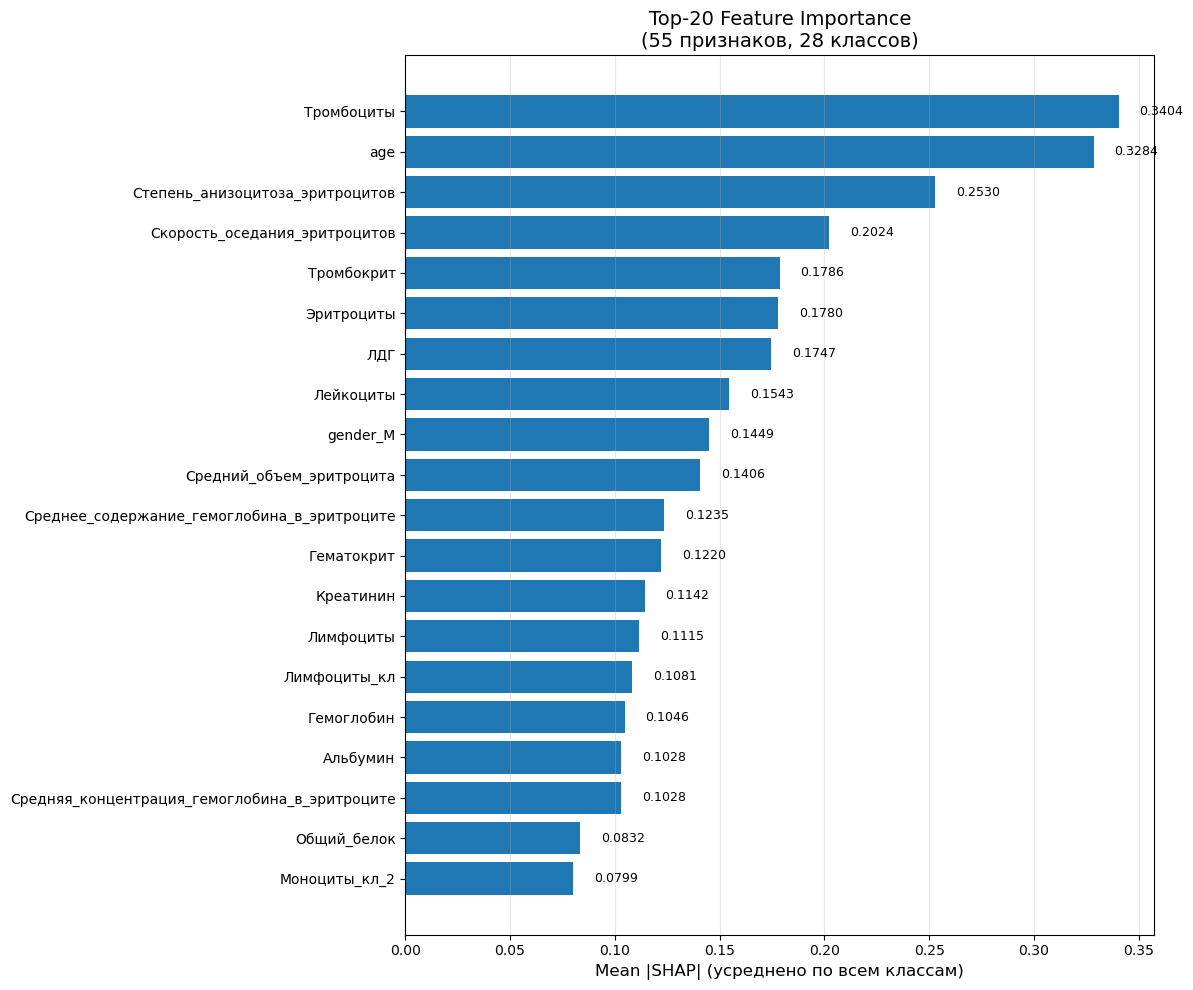

In [32]:
import matplotlib.pyplot as plt

top_n = 20 
top_features = feature_importance_df.head(top_n)


plt.figure(figsize=(12, 10))
bars = plt.barh(range(top_n), top_features["global_importance"][::-1])
plt.yticks(range(top_n), top_features["feature"][::-1])
plt.xlabel('Mean |SHAP| (усреднено по всем классам)', fontsize=12)
plt.title(f'Top-{top_n} Feature Importance\n(55 признаков, 28 классов)', fontsize=14)
plt.grid(axis='x', alpha=0.3)


for i, (bar,val) in enumerate(zip(bars, top_features["global_importance"][::-1])):
    plt.text(val+0.01, bar.get_y()+bar.get_height()/2, 
             f"{val:.4f}", 
             va = "center",
             fontsize = 9)

plt.tight_layout()
plt.show()

- усреднять как-то не очень, поэтому лучше посмотреть отдельно по болезням

In [39]:
def analyze_disease_importance( shap_values, classes, feature_names, disease_name="healthy", top_n=10):
    """Analysis for certain diseases"""
    
    disease_idx = np.where(classes==disease_name)[0][0]

    disease_shap = shap_values[:, :, disease_idx]
    disease_importance = np.mean(np.abs(disease_shap), axis=0)

    df = pd.DataFrame(
        {
            "feature" :  feature_names, 
            f"importance_{disease_name}": disease_importance
        }
    ).sort_values(f"importance_{disease_name}", ascending=False)

    print(f"\nТоп-{top_n} признаков для болезни '{disease_name}':")
    for i, (_, row) in enumerate(df.head(top_n).iterrows(), 1):
        print(f"{i:2d}. {row['feature']:15s} - {row[f'importance_{disease_name}']:.6f}")

    return df


for disease in ['healthy', "C90.0", "C92.4", "D69.5", "D69.6", "D68.8"]:
    if disease in classes:
        analyze_disease_importance(shap_values, classes, feature_names, disease, top_n=10)


Топ-10 признаков для болезни 'healthy':
 1. Скорость_оседания_эритроцитов - 0.411926
 2. Креатинин       - 0.359022
 3. Степень_анизоцитоза_эритроцитов - 0.341291
 4. age             - 0.294876
 5. Тромбоциты      - 0.277743
 6. Гематокрит      - 0.223724
 7. Эритроциты      - 0.218427
 8. Тромбокрит      - 0.196999
 9. Сегментоядерные_н - 0.188608
10. Общий_белок     - 0.185899

Топ-10 признаков для болезни 'C90.0':
 1. age             - 0.810801
 2. Креатинин       - 0.331660
 3. Тромбоциты      - 0.286477
 4. Мочевая_кислота - 0.230383
 5. Мочевина        - 0.201187
 6. ЛДГ             - 0.164660
 7. Эритроциты      - 0.147575
 8. Тромбокрит      - 0.145202
 9. Степень_анизоцитоза_эритроцитов - 0.142263
10. Моноциты_кл_1   - 0.125106

Топ-10 признаков для болезни 'C92.4':
 1. age             - 0.410381
 2. Степень_анизоцитоза_эритроцитов - 0.305769
 3. Эритроциты      - 0.295822
 4. Среднее_содержание_гемоглобина_в_эритроците - 0.241632
 5. Средний_объем_эритроцита - 0.200230
 6. С

- C92.4 (ОПЛ)
    - гематокрит и гемоглобин пониженное (++)
    - лейкоциты супер повышенные (в два раза)
    - недифф бласты повышенные (+++)
    - тромбоциты пониж (+)
    - эритроциты пониж (чуть-чуть)
    - ЛДГ повышенное (+++)

- D69.5 (Вторичная тромбоцитопения)
    - тромбоциты пониженное (++)

- D69.6 (Тромбоцитопения неуточненная)
    - тромбоциты пониженное (++)

- C92.0
    - лейкоциты повышенные (+)
    - недифф бласты повышены (++)
    - низкие эритроциты (чуть-чуть)
    - лдг повышенное (++)
